# Exploratory Data Analysis of IBM HR Attrition Dataset

Attrition is the process by which a worker departs an organisation due to retirement or resignation. Workers leave the organisation for both personal and professional reasons, such as retirement, reduced career opportunities, decreased job satisfaction, decreased pay rates, unfavourable working conditions, etc. Any firm will experience attrition. When attrition exceeds a certain threshold, it becomes a problem.

The analysis's [dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) comes from Kaggle. We use Python and modules like pandas, matplotlib, and seaborn to gain insights into the causes of employee attrition. Most of the time in this project, we'll  discuss absolute and percentage values.

#### Importing libraries and loading dataset

In [1]:
# importing necesasary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Loading Data and displaying top 5 rows
data = pd.read_csv("HR_Employee_Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Summary Stats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Observation:
There are 26 variables which are integers(some of the categorical variables are represented in integer format) and 9 variables that are of string datatype.

### Attrition percentage

16.12% of the employees resigned/retired


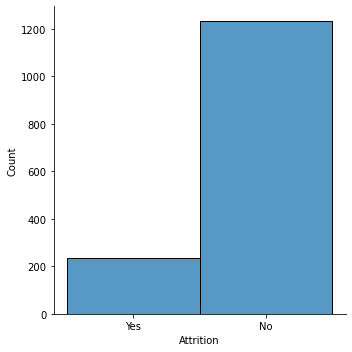

In [64]:
#Attrition percentage
print("{:.2f}% of the employees resigned/retired".format(data["Attrition"].value_counts()["Yes"]/len(data["Attrition"])*100))
sns.displot(data = data, x = "Attrition")

#### Observation: 
The attrition percentage is 16.12% in our dataset, which varies for different companies.

### Gender

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


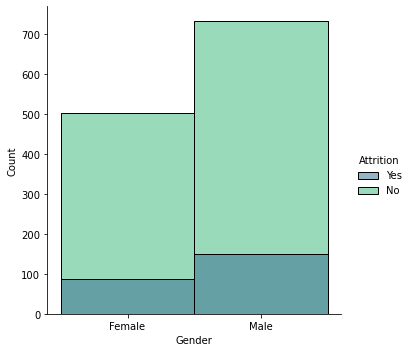

In [69]:
groupby_Gender = data.groupby("Gender")["Attrition"]
print(groupby_Gender.value_counts())
sns.displot(data = data, x = "Gender", hue = "Attrition", palette ='viridis')

In [70]:
print("\nOf the total employees resigned/retired, {:.2f}% are Female".format(
    groupby_Gender.value_counts()["Female"]["Yes"]/
    (groupby_Gender.value_counts()["Female"]["Yes"] + groupby_Gender.value_counts()["Male"]["Yes"])*100))

print("Of the total employees resigned/retired, {:.2f}% are Male".format(
    groupby_Gender.value_counts()["Male"]["Yes"]/
    (groupby_Gender.value_counts()["Female"]["Yes"] + groupby_Gender.value_counts()["Male"]["Yes"])*100))

print("Of the total Male employees, {:.2f}% resigned/retired".format(
    groupby_Gender.value_counts()["Male"]["Yes"]/data["Gender"].value_counts()["Male"]*100))

print("Of the total Female employees, {:.2f}% resigned/retired".format(
    groupby_Gender.value_counts()["Female"]["Yes"]/data["Gender"].value_counts()["Female"]*100))


Of the total employees resigned/retired, 36.71% are Female
Of the total employees resigned/retired, 63.29% are Male
Of the total Male employees, 17.01% resigned/retired
Of the total Female employees, 14.80% resigned/retired


#### Observation:
Considering both absolute and percentage values, Male attrition is more than Female attrition.

### Business Travel

Attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
Yes        Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: BusinessTravel, dtype: int64


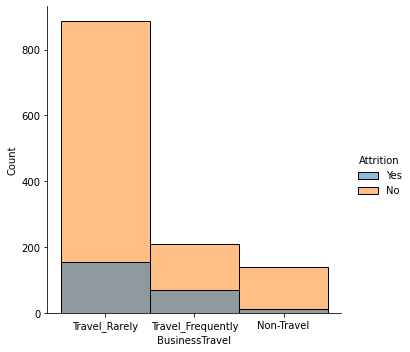

In [72]:
groupby_BusinessTravel = data.groupby("Attrition")["BusinessTravel"]
print(groupby_BusinessTravel.value_counts())
sns.displot(data = data, x = "BusinessTravel", hue = "Attrition")

#### Observation:
Considering absolute values, employees traveling rarely resigned/retired mostly (156 employes) and when percentage values are considered, employees traveling frequently resigned/retired mostly (around 25%).

### Age

In [74]:
data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Minimum and Maximum age of the workforce is 18 and 60 years respectively.

<AxesSubplot:xlabel='Age', ylabel='Count'>

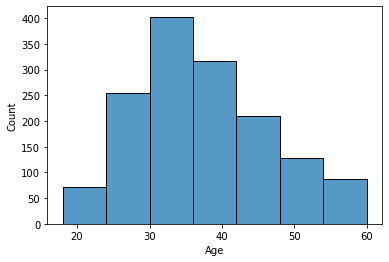

In [80]:
plt.figure()
sns.histplot(data = data, x = "Age", bins = 7)

#### Observation:
From above histogram, we can get to know that most of the employees fall in the working age between 24 and 48.

<AxesSubplot:xlabel='Age', ylabel='Count'>

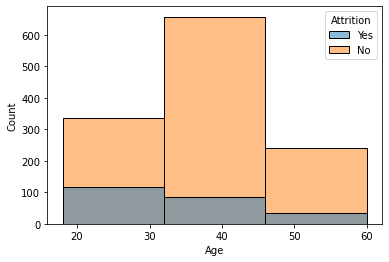

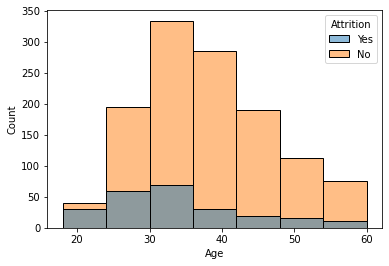

In [82]:
plt.figure()
sns.histplot(data = data, x = "Age", bins = 3, hue = "Attrition")
plt.figure()
sns.histplot(data = data, x = "Age", bins = 7, hue = "Attrition")

#### Observation:
From the histplot (where bins = 3), we can infer that absolute (more than 100 employees) and percentage values (around 33%) of employees are resigning whose age is less than 32. If this percentage value (around 33%) is greater than the industry average then this should be a cause of worry and the top-level management should try to bring this down by retaining the workforce.
From the histplot (where bins = 7), we can infer that around 45 out of 50 the employees whose age is less than 24 resign. This number should also be a cause of worry for top-level management.

### Education

1. 'Below College'
2. 'College'
3. 'Bachelor'
4. 'Master'
5. 'Doctor'

Education
3    41.772152
4    24.472574
2    18.565401
1    13.080169
5     2.109705
Name: Education, dtype: float64

Of the total employees, 38.91% has Bachelor Degree
Of the total employees resigned/retired, 41.77% were Undergraduates


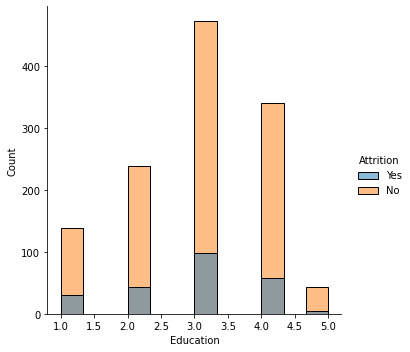

In [98]:
#Grouping Attrition by Education
gropuby_Education = data.groupby("Attrition")["Education"]
#Showing the Percentage Attrition for different Education Level
print(100*gropuby_Education.value_counts()["Yes"]/sum(gropuby_Education.value_counts()["Yes"]))

print("\nOf the total employees, {:.2f}% has Bachelor Degree".format(
    100*(gropuby_Education.value_counts()[0] + gropuby_Education.value_counts()[5])/sum(gropuby_Education.value_counts())))
print("Of the total employees resigned/retired, {:.2f}% were Undergraduates".format(
    gropuby_Education.value_counts()["Yes"][3]/sum(gropuby_Education.value_counts()["Yes"])*100))

#Plotting the Education on graph
sns.displot(data = data, x = "Education", hue = "Attrition")

#### Observation:
Around 100 employees with Bachelors Education resigned/retired and around 42% of employees with Bachelor Education resigned/retired.

### Daily Rate

Minimum DailyRate of employee is 102
Maximum DailyRate of employee is 1499


<AxesSubplot:xlabel='DailyRate', ylabel='Count'>

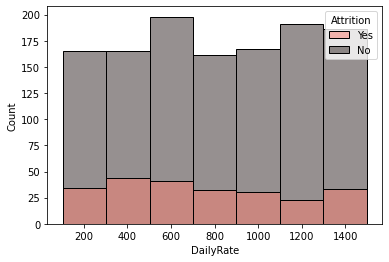

In [108]:
#Some Stats
print("Minimum DailyRate of employee is {}".format(data["DailyRate"].min()))
print("Maximum DailyRate of employee is {}".format(data["DailyRate"].max()))

#Visualizing Daily rate on Graph
plt.figure()
sns.histplot(data = data, x = "DailyRate", bins = 7, hue = "Attrition", palette = 'dark:salmon_r')

#### Observation:
The distribution looks almost uniform. By visual inspection of the above histogram, we can say that employees with a Daily rate in between 300 and 500 resign/retire more when compared to other Daily rates.

### Department

Attrition  Department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: Department, dtype: int64
Percentage of people retired from Sales Department is 20.63%
Percentage of people retired from Human Resources Department is 19.05%


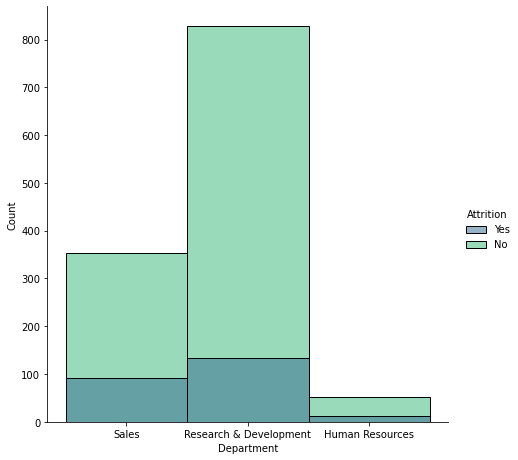

In [128]:
#Grouping the data on basis of department
groupby_Department = data.groupby("Attrition")["Department"]
print(groupby_Department.value_counts())

#Stats
print("Percentage of people retired from Sales Department is {:.2f}%".format(
    100*groupby_Department.value_counts()["Yes"]["Sales"]/
    (groupby_Department.value_counts()["No"]["Sales"]+groupby_Department.value_counts()["Yes"]["Sales"])))
print("Percentage of people retired from Human Resources Department is {:.2f}%".format(
    100*groupby_Department.value_counts()["Yes"]["Human Resources"]/
    (groupby_Department.value_counts()["No"]["Human Resources"]+groupby_Department.value_counts()["Yes"]["Human Resources"])))


#Plotting on Graph
sns.displot(data = data, x = "Department", hue = "Attrition", height = 6.5, palette = 'viridis')

#### Observation: 
Absolute number (133) of employees resigning/retiring from R&D is more but percentage-wise 20.6% and HR 19% of employees resign/retire from Sales and HR respectively.

### Job Role

Let's check the average salary for each job role.

In [130]:
AvgSalary = data['MonthlyIncome'].groupby(data['JobRole']).mean()

AvgSalary.sort_values(ascending=False)

JobRole
Manager                      17181.676471
Research Director            16033.550000
Healthcare Representative     7528.763359
Manufacturing Director        7295.137931
Sales Executive               6924.279141
Human Resources               4235.750000
Research Scientist            3239.972603
Laboratory Technician         3237.169884
Sales Representative          2626.000000
Name: MonthlyIncome, dtype: float64

Let's say we want to the observe the Attrition in Each JobRole and plot them on a graph for better understanding of which job role has higher atrrition rate.

<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

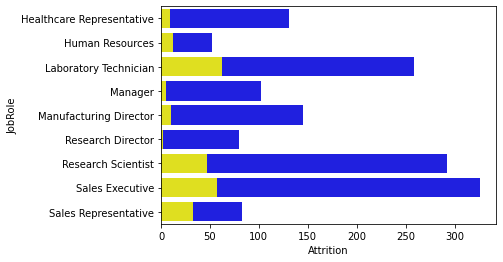

In [142]:
# Creating seperate dataframes 
Attrition_count = data['Attrition'][data['Attrition']=='Yes'].groupby(data['JobRole']).count().to_frame()
Total_Employee_count = data['JobRole'].groupby(data['JobRole']).count().to_frame()

# Merging both dataframes:
Employee_attrition_df = Total_Employee_count.merge(Attrition_count,left_index=True,right_index=True)

# Ploting the data on a bar graph:

sns.barplot(y=Employee_attrition_df.index,
            x='JobRole',
            data=Employee_attrition_df,
            color='blue') 

sns.barplot(y=Employee_attrition_df.index,
            x='Attrition',
            data=Employee_attrition_df,
            color='yellow') 

In [143]:
# Net Employee Count & Percentage of employees quit in Each JobRole:

Employee_attrition_df['NetEmployeeCount'] = Employee_attrition_df['JobRole']-Employee_attrition_df['Attrition']
Employee_attrition_df['PercentageLeftIBM'] = Employee_attrition_df['Attrition']/Employee_attrition_df['JobRole']*100

Employee_attrition_df 

,JobRole,Attrition,NetEmployeeCount,PercentageLeftIBM
JobRole,,,,
Healthcare Representative,131,9,122,6.870229
Human Resources,52,12,40,23.076923
Laboratory Technician,259,62,197,23.938224
Manager,102,5,97,4.901961
Manufacturing Director,145,10,135,6.896552
Research Director,80,2,78,2.500000
Research Scientist,292,47,245,16.095890
Sales Executive,326,57,269,17.484663
Sales Representative,83,33,50,39.759036


#### Observation:
The attrition rate in Research Director and Manager role is seen very less comparitive to other roles, this fact might be supported with an argument that the average pay of these roles is more than other roles. Hence we can say that right pay can incentivize the people to not leave the Organization.

### Correlation
Let's check the Correlation between Total Years of Experience and Salary of the Employees.

Correlation Coefficient is 0.773


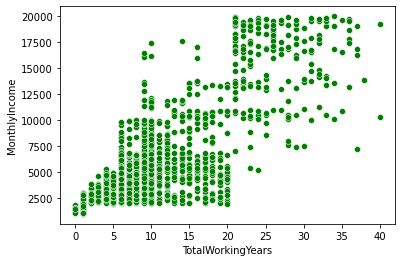

In [144]:
#using the scatterplot
sns.scatterplot(x='TotalWorkingYears',
                y='MonthlyIncome',
                data=data,
                color='green') 

# Correlation Coefficient:
Coeff = data['TotalWorkingYears'].corr(data['MonthlyIncome'])
print('Correlation Coefficient is',round(Coeff,3)) 

#### Observation:
Total Working Years and Salary of Employees have a good positive correlation, which means that they are directly propotional also by graphical observation it seems that data has some amount of outliers as well.

## Conclusion: 
There are many factors that make an employee resign and using the IBM dataset, some interesting insights were obtained. These insights can be used to build the model.